In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings(action = 'ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

# 한글폰트
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [403]:
df = pd.read_csv("C:/Users/midashrm/Documents/Pythonwork/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data = df
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 데이터 설명

#### Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

#### EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

#### JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

#### JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

#### PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

#### RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

#### WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [404]:
# 퇴사 라벨링(퇴사:1 재직:0), 요인 표준화

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
label = LabelEncoder()
data["Attrition"] = label.fit_transform(data.Attrition)

In [405]:
Id_col = ['EmployeeNumber']
target_col = ["Attrition"]

# 쓸데 없는 요인 제거
data.drop(['EmployeeCount', 'Over18',  "HourlyRate", "DailyRate", "StandardHours"], axis="columns", inplace=True)


# 범주형 칼럼
cat_cols   = data.nunique()[data.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
# 숫자형 칼럼
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]
# 이진 칼럼
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
# 다중 칼럼
multi_cols = [i for i in cat_cols if i not in bin_cols]

# 이진 칼럽 라벨링
label = LabelEncoder()
for i in bin_cols :
    data[i] = label.fit_transform(data[i])
    
# 다중 칼럼 더미화
data = pd.get_dummies(data = data,columns = multi_cols )

# 숫자형 칼럼 일반화
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

# 일반화 된 칼럽 합치기
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")
data = data.drop(['EmployeeNumber'],axis = 1)

# 중복치 제거
data = data.T.drop_duplicates()
data = data.T
data.drop_duplicates(inplace=True)
data

,Attrition,Gender,OverTime,PerformanceRating,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.45,-1.01,-0.11,0.73,2.13,-1.15,-0.42,-0.16,-0.06,-0.68,0.25
1,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.32,-0.15,-0.29,1.49,-0.68,2.13,-0.16,0.49,0.76,-0.37,0.81
2,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.01,-0.89,-0.94,-1.67,1.32,-0.06,-0.55,-1.14,-1.17,-0.68,-1.16
3,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.43,-0.76,-0.76,1.24,-0.68,-1.15,-0.42,0.16,0.76,0.25,-1.16
4,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-1.09,-0.89,-0.64,0.33,2.53,-0.88,-0.68,-0.82,-0.62,-0.06,-0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## 변수 간 상관관계 분석, 확인 및 변수 제거

<AxesSubplot:>

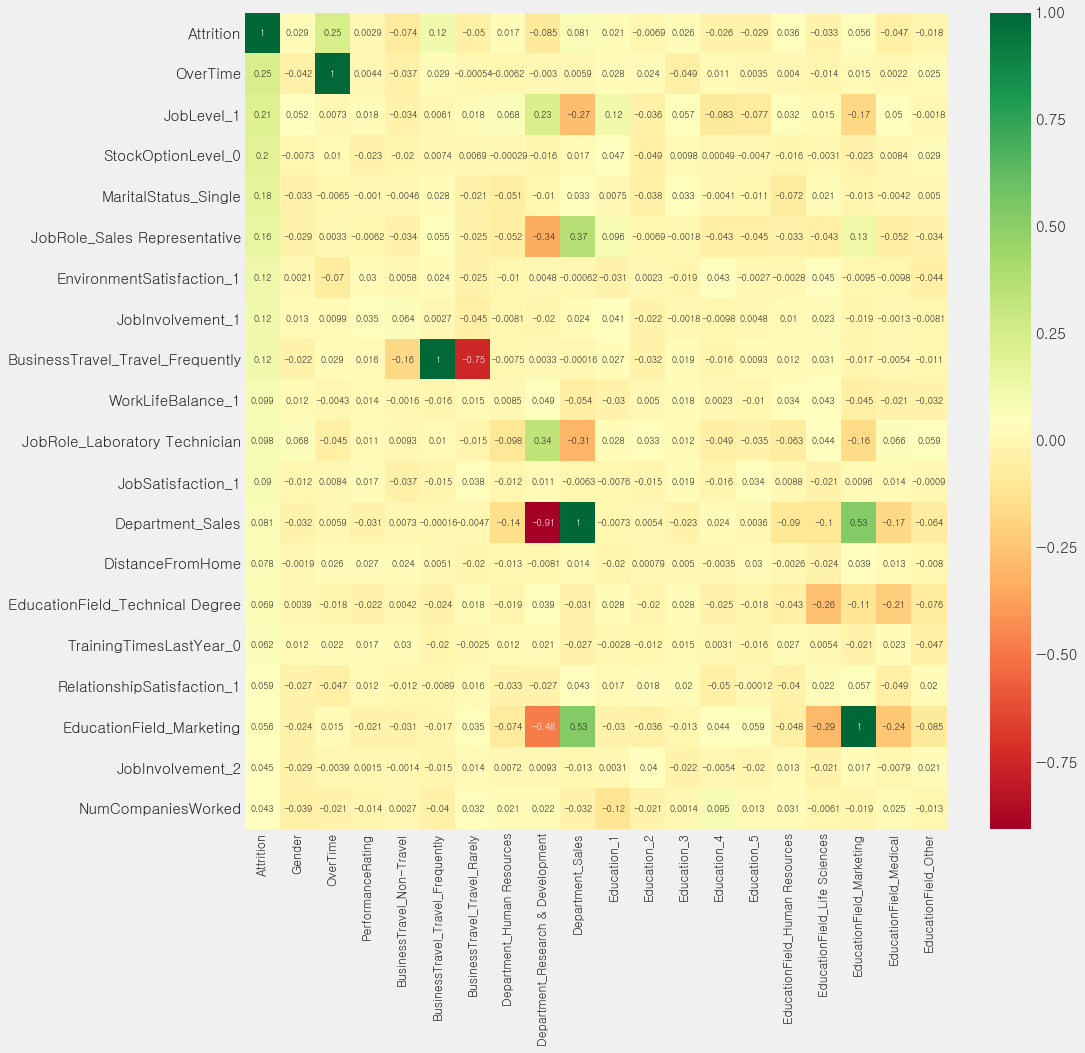

In [406]:
correlation = data.corr().nlargest(20,data.columns)
matrix_cols = correlation.columns.tolist()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation[matrix_cols[:20]], annot=True, cmap="RdYlGn", annot_kws={"size":9})

### 서로 상관관게 높은 변수 제거

In [407]:
# 상관관계 Threshold
threshold = 0.8

# Correlation Matrix의 절대값
corr_matrix = data.corr().abs()
corr_matrix.head()

# Correlation Matrix의 상삼각
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# 상관관계가 0.8을 넘는 변수 골라내기
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('%d개의 칼럼이 제거됩니다 :' % (len(to_drop)))

data = data.drop(columns = to_drop)

to_drop

3개의 칼럼이 제거됩니다 :


['Department_Sales', 'JobRole_Human Resources', 'JobRole_Sales Executive']

<AxesSubplot:>

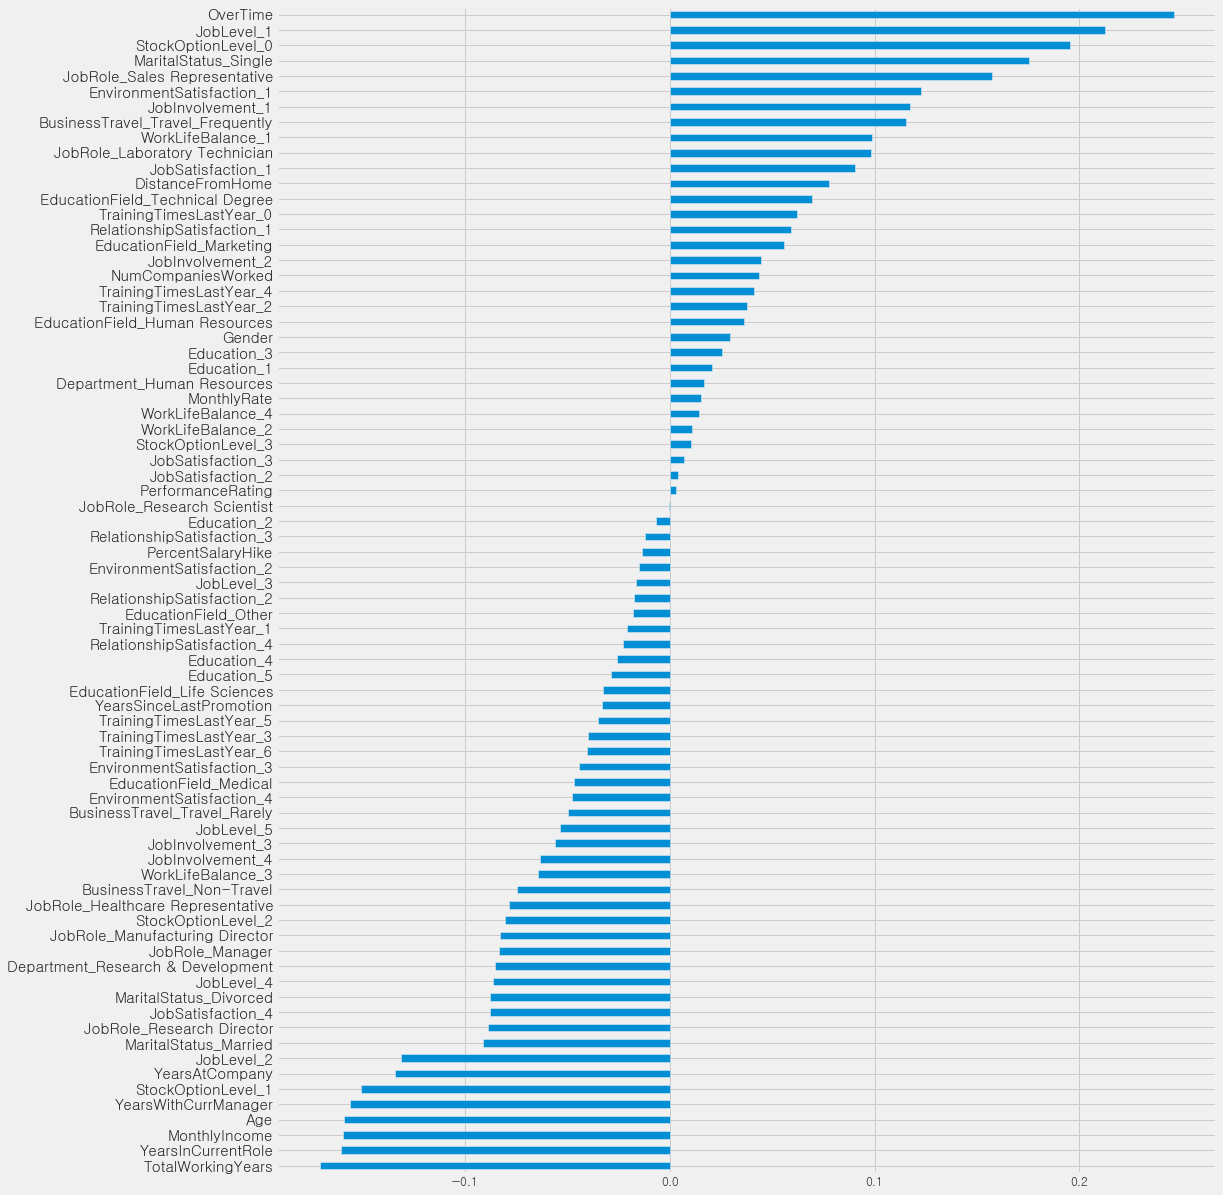

In [408]:
# 퇴직과 요인 간 상관관계 분석
df = data
df.drop("Attrition", axis=1).corrwith(df.Attrition).sort_values(ascending=True).plot(kind='barh', figsize=(15, 20))

<AxesSubplot:>

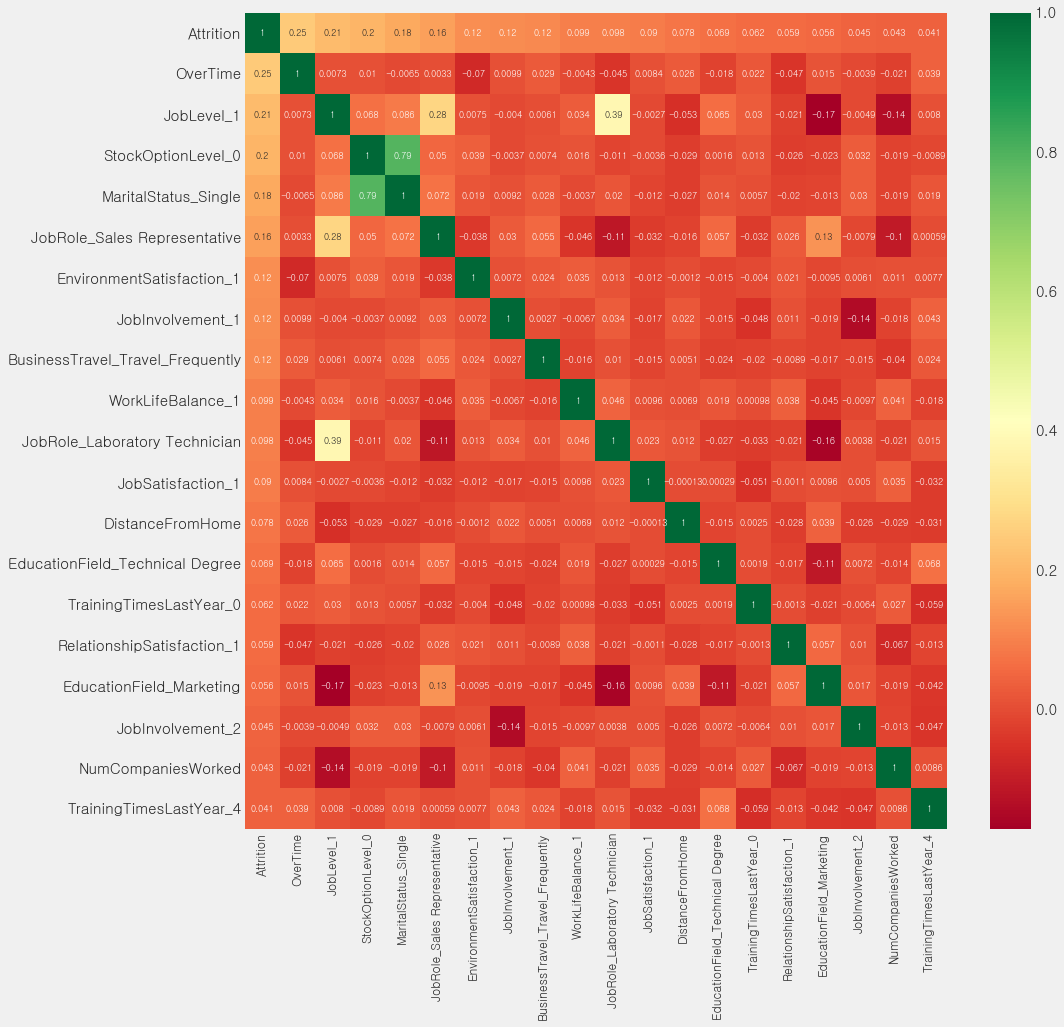

In [409]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(14, 14))
sns.heatmap(df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":9})

# 머신러닝 모델 평가

### 분류 평가 지표
1. Accuracy(정확도)
2. Recall/Sensitivity(재현율/민감도)
3. Precision(정밀도)
4. F1 Score
5. Roc_Auc_Score

----
### 분류평가기준
    
#### Confusion Matrix (오차행렬)
- Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표
- TP(True Positive) - 양성으로 예측했는데 맞은 개수
- TN(True Negative) - 음성으로 예측했는데 맞은 개수
- FP(False Positive) - 양성으로 예측했는데 틀린 개수 (음성을 양성으로 예측)
- FN(False Negative) - 음성으로 예측했는데 틀린 개수 (양성을 음성으로 예측)

#### 1. Accuracy(정확도)
- 전체 데이터 중에 올바르게 예측한 것의 비율
- TP+TN / TP+FN+FP+TN

#### 2. Recall/Sensitivity(재현율/민감도)
- 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
- TPR(True Positive Rate) 이라고도 한다
- 재현율 = TP/TP+FN
- ex) 실제 스팸 메일 중 스팸메일로 예측한 비율, 실제 퇴사자 중 퇴사로 예측한 비율
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우 중요
- ex) 암환자 판정 모델, 보험사기적발 모델

#### 3. Precision(정밀도)
- Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
- PPV(Positive Predictive Value) 라고도 한다.
- TP/TP+FP
- ex) 스팸메일로 예측한 것 중 실제 스팸메일의 비율, 퇴사자로 예측한 것 중 실제 퇴사자의 비율
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우 중요
- ex) 스팸메일 판정

##### ※ 참고. Specificity(특이도), Fall out(위양성률)
- Specificity(특이도): 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - TNR(True Negative Rate) 라고도 한다.
- Fall out(위양성률): 실제 Negative(음성)인 것들 중 Negative(양성)으로 잘못 예측한 것의 비율(1 - 특이도)
    - FPR (False Positive Rate) 라고도 한다.

#### 4. F1 Score
- Precison과 Recall의 조화평균
- 2 * Recall * Precision/Recall+Precision
- 일반적으로 데이터가 불균형할 때 많이 사용

#### 5. Roc_Auc Score
- Roc Curve: 위 양성률(FPR)을 X축, 재현율(TPR)을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- Auc : Roc Curve아래의 면적
    - 점수 기준
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델
- 이진 분류 모델 성능 측정에서 주요하게 사용됨


In [11]:
# 함수목록

def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("훈련 결과: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"\n오차행렬:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"\n정확도 점수:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"\n분류 보고:\n{clf_report}")

    print("\n테스트 결과: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"\n오차행렬:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"\n정확도 점수:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"\n분류 보고:\n{clf_report}")

    
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [12]:
# 훈련, 테스트 데이터 분리, 훈련 데이터 일반화

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

#X_train_std = scaler.fit_transform(X_train)
#X_test_std = scaler.transform(X_test)
#X_std = scaler.transform(X)

## Best 모델 찾기

In [13]:
#!pip install xgboost
#!pip install lightGBM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


model_list = ["LogisticRegression", "Random Forest Classifier", "Support Vector Machine", "XGBoost", "LightGBM"]
models = [LogisticRegression(), RandomForestClassifier(), SVC(), XGBClassifier(eval_metric="mlogloss"), LGBMClassifier()]

In [14]:
Train_accuracy_list = []
Train_roc_auc_score_list = []
Train_cv_score_list = []
Test_accuracy_list = []
Test_roc_auc_score_list = []
Test_cv_score_list = []

for model in models:
    
    model.fit(X_train, y_train)
    Train_accuracy_list.append(accuracy_score(y_train, model.predict(X_train)))
    Train_roc_auc_score_list.append(roc_auc_score(y_train, model.predict(X_train)))
    Train_cv_score_list.append(cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy').mean())
    print(model,"Train 완료")
    
    Test_accuracy_list.append(accuracy_score(y_test, model.predict(X_test)))
    Test_roc_auc_score_list.append(roc_auc_score(y_test, model.predict(X_test)))
    Test_cv_score_list.append(cross_val_score(model,X_test,y_test,cv=10,scoring='accuracy').mean())
    print(model,"Test 완료")
    
Pred_score = pd.DataFrame({"Train_roc_auc_score":Train_roc_auc_score_list, "Train_accuracy" : Train_accuracy_list,  "Train_cv_score":Train_cv_score_list,
                          "Test_roc_auc_score": Test_roc_auc_score_list, "Test_accuracy":Test_accuracy_list, "Test_cv_score":Test_cv_score_list}, index=model_list )



LogisticRegression() Train 완료
LogisticRegression() Test 완료
RandomForestClassifier() Train 완료
RandomForestClassifier() Test 완료
SVC() Train 완료
SVC() Test 완료
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None) Train 완료
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
           

In [15]:
Pred_score

,Train_roc_auc_score,Train_accuracy,Train_cv_score,Test_roc_auc_score,Test_accuracy,Test_cv_score
LogisticRegression,0.77,0.91,0.89,0.72,0.89,0.85
Random Forest Classifier,1.00,1.00,0.87,0.54,0.84,0.84
Support Vector Machine,0.75,0.92,0.87,0.58,0.85,0.84
XGBoost,1.00,1.00,0.87,0.60,0.84,0.84
LightGBM,1.00,1.00,0.87,0.61,0.85,0.85


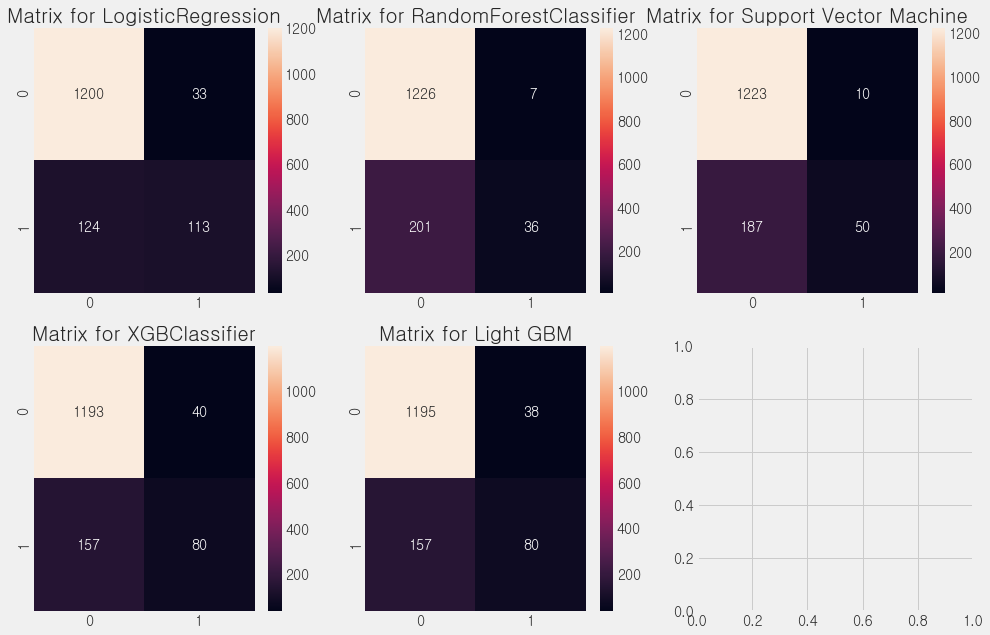

In [20]:
# Confusion matrix

f,ax=plt.subplots(2,3,figsize=(15,10))

y_pred=cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for LogisticRegression')

y_pred=cross_val_predict(RandomForestClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for RandomForestClassifier')

y_pred=cross_val_predict(SVC(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for Support Vector Machine')

y_pred=cross_val_predict(XGBClassifier(eval_metric="mlogloss"),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for XGBClassifier')

y_pred=cross_val_predict(LGBMClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Light GBM')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### 과대적합, 과소적합 해소를 위한 파라미터 조절 후 성능평가 다시 진행

In [41]:
Test_accuracy_list = []
Test_roc_auc_score_list = []
Test_cv_score_list = []

## 1. Linear Rgression

In [22]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[845  18]
 [ 73  93]]

정확도 점수:
0.9116

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   0.92   0.84      0.91       0.88          0.91
recall      0.98   0.56      0.91       0.77          0.91
f1-score    0.95   0.67      0.91       0.81          0.90
support   863.00 166.00      0.91    1029.00       1029.00

테스트 결과: 

오차행렬:
[[360  10]
 [ 38  33]]

정확도 점수:
0.8912

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.90  0.77      0.89       0.84          0.88
recall      0.97  0.46      0.89       0.72          0.89
f1-score    0.94  0.58      0.89       0.76          0.88
support   370.00 71.00      0.89     441.00        441.00


In [23]:
print("Roc_Auc_Score:",roc_auc_score(y_test, lr_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, lr_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(lr_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.7188808526836696
정확도 점수: 0.891156462585034
정확도 교차 검증 점수: 0.8458080808080808


## 1-2. 파라미터 조정

In [40]:
from sklearn.model_selection import RandomizedSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10],
       "class_weight":['None','imbalanced','balanced'],
       "solver" :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
       "penalty" :['none', 'l1', 'l2', 'elasticnet']}

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(lr_clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=5, verbose=3, random_state=42)
start_time = timer(None)
random_search.fit(X_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(random_search.best_params_, 
                                                  random_search.best_score_))
timer(start_time)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   38.9s finished


최적 하이퍼 파라미터:{'solver': 'saga', 'penalty': 'l1', 'class_weight': 'None', 'C': 1}, 최적 평균 정확도:0.857

 Time taken: 0 hours 0 minutes and 39.46 seconds.


In [42]:
lr_clf = LogisticRegression(C=1, class_weight=None, solver='saga', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[847  16]
 [ 75  91]]

정확도 점수:
0.9116

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   0.92   0.85      0.91       0.88          0.91
recall      0.98   0.55      0.91       0.76          0.91
f1-score    0.95   0.67      0.91       0.81          0.90
support   863.00 166.00      0.91    1029.00       1029.00

테스트 결과: 

오차행렬:
[[362   8]
 [ 38  33]]

정확도 점수:
0.8957

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.91  0.80      0.90       0.85          0.89
recall      0.98  0.46      0.90       0.72          0.90
f1-score    0.94  0.59      0.90       0.76          0.88
support   370.00 71.00      0.90     441.00        441.00


In [43]:
print("Roc_Auc_Score:",roc_auc_score(y_test, lr_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, lr_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(lr_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Test_roc_auc_score_list.append(roc_auc_score(y_test, lr_clf.predict(X_test)))
Test_accuracy_list.append(accuracy_score(y_test, lr_clf.predict(X_test)))
Test_cv_score_list.append(cross_val_score(lr_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.7215835553863723
정확도 점수: 0.8956916099773242
정확도 교차 검증 점수: 0.8480808080808082


## 중요도 구하기

In [361]:
# 지수 함수로 변환

odds = np.exp(lr_clf.coef_[0])
Coef_exp = pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
Coef_exp.rename(columns = {"coef" : "중요도"}, inplace=True)

In [362]:
Coef_exp.head(10)

,중요도
OverTime,6.84
JobInvolvement_1,3.39
RelationshipSatisfaction_1,2.79
EnvironmentSatisfaction_1,2.73
StockOptionLevel_0,2.52
BusinessTravel_Travel_Frequently,2.51
WorkLifeBalance_1,2.29
TrainingTimesLastYear_0,2.04
YearsSinceLastPromotion,1.67
NumCompaniesWorked,1.65


Text(0.5, 1.0, '로지스틱 회귀분석에 따른 중요도(지수화)')

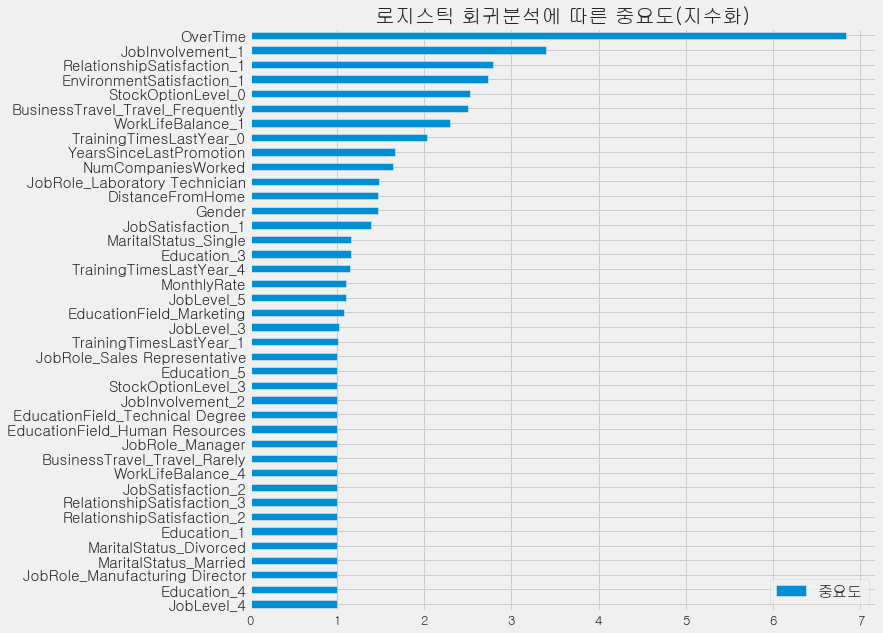

In [377]:
parameters = {'xtick.labelsize': 13, 'ytick.labelsize': 15, 'legend.fontsize': 15, }
plt.rcParams.update(parameters)


Coef_exp.head(40).sort_values(by='중요도').plot(kind='barh', figsize=(10,10))
plt.title("로지스틱 회귀분석에 따른 중요도(지수화)",fontsize=20)

## 2-1. RandomForest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[863   0]
 [  0 166]]

정확도 점수:
1.0000

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00

테스트 결과: 

오차행렬:
[[359  11]
 [ 61  10]]

정확도 점수:
0.8367

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.85  0.48      0.84       0.67          0.79
recall      0.97  0.14      0.84       0.56          0.84
f1-score    0.91  0.22      0.84       0.56          0.80
support   370.00 71.00      0.84     441.00        441.00


In [48]:
print("Roc_Auc_Score:",roc_auc_score(y_test, rf_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, rf_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(rf_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.5555576703464028
정확도 점수: 0.8367346938775511
정확도 교차 검증 점수: 0.8481313131313131


## 2-2. 파라미터 조정

In [49]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)




folds = 5
param_comb = 800

random_search = RandomizedSearchCV(rf_clf, param_distributions=param_grid, scoring='roc_auc',n_jobs=-1, cv=5, verbose=3, random_state=42)
start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(random_search.best_params_, 
                                                  random_search.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.4s finished



 Time taken: 0 hours 0 minutes and 53.75 seconds.
최적 하이퍼 파라미터:{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}, 최적 평균 정확도:0.812


In [50]:
rf_clf = RandomForestClassifier(n_estimators=500, min_samples_split = 2, min_samples_leaf=4, max_features='auto',
                                max_depth=10, bootstrap=True,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[862   1]
 [107  59]]

정확도 점수:
0.8950

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   0.89   0.98      0.90       0.94          0.90
recall      1.00   0.36      0.90       0.68          0.90
f1-score    0.94   0.52      0.90       0.73          0.87
support   863.00 166.00      0.90    1029.00       1029.00

테스트 결과: 

오차행렬:
[[363   7]
 [ 63   8]]

정확도 점수:
0.8413

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.85  0.53      0.84       0.69          0.80
recall      0.98  0.11      0.84       0.55          0.84
f1-score    0.91  0.19      0.84       0.55          0.80
support   370.00 71.00      0.84     441.00        441.00


In [51]:
print("Roc_Auc_Score:",roc_auc_score(y_test, rf_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, rf_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(rf_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Test_roc_auc_score_list.append(roc_auc_score(y_test, rf_clf.predict(X_test)))
Test_accuracy_list.append(accuracy_score(y_test, rf_clf.predict(X_test)))
Test_cv_score_list.append(cross_val_score(rf_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.5468785687095546
정확도 점수: 0.8412698412698413
정확도 교차 검증 점수: 0.8435858585858587


Text(0.5, 1.0, 'Feature Importance according to Random Forest')

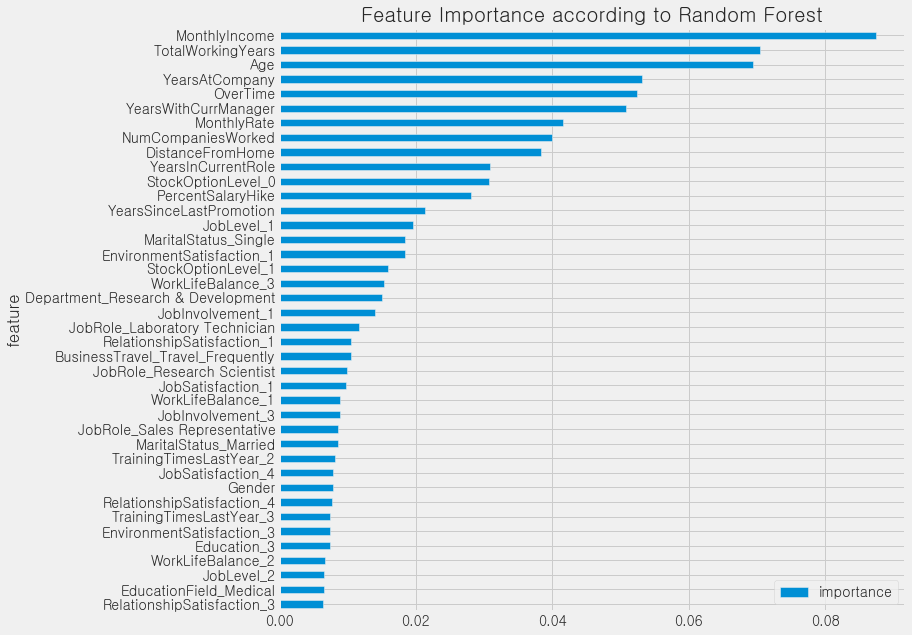

In [52]:
df = feature_imp(X, rf_clf)[:40].sort_values(by='importance')
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

## 3-1. SVM(Support Vector Machine)

In [53]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[849  14]
 [ 67  99]]

정확도 점수:
0.9213

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   0.93   0.88      0.92       0.90          0.92
recall      0.98   0.60      0.92       0.79          0.92
f1-score    0.95   0.71      0.92       0.83          0.91
support   863.00 166.00      0.92    1029.00       1029.00

테스트 결과: 

오차행렬:
[[354  16]
 [ 36  35]]

정확도 점수:
0.8821

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.91  0.69      0.88       0.80          0.87
recall      0.96  0.49      0.88       0.72          0.88
f1-score    0.93  0.57      0.88       0.75          0.87
support   370.00 71.00      0.88     441.00        441.00


In [54]:
print("Roc_Auc_Score:",roc_auc_score(y_test, svm_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, svm_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(svm_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.724857251617815
정확도 점수: 0.8820861678004536
정확도 교차 검증 점수: 0.8593434343434344


## 3-2. 파라미터 조정

In [55]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train, y_train)

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(search.best_params_, 
                                                  search.best_score_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 하이퍼 파라미터:{'C': 1, 'kernel': 'linear'}, 최적 평균 정확도:0.849


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.0min finished


In [57]:
svm_clf = SVC(C = 1, kernel = "linear")
svm_clf.fit(X_train, y_train)
evaluate(svm_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[849  14]
 [ 67  99]]

정확도 점수:
0.9213

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   0.93   0.88      0.92       0.90          0.92
recall      0.98   0.60      0.92       0.79          0.92
f1-score    0.95   0.71      0.92       0.83          0.91
support   863.00 166.00      0.92    1029.00       1029.00

테스트 결과: 

오차행렬:
[[354  16]
 [ 36  35]]

정확도 점수:
0.8821

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.91  0.69      0.88       0.80          0.87
recall      0.96  0.49      0.88       0.72          0.88
f1-score    0.93  0.57      0.88       0.75          0.87
support   370.00 71.00      0.88     441.00        441.00


In [58]:
print("Roc_Auc_Score:",roc_auc_score(y_test, svm_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, svm_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(svm_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Test_roc_auc_score_list.append(roc_auc_score(y_test, svm_clf.predict(X_test)))
Test_accuracy_list.append(accuracy_score(y_test, svm_clf.predict(X_test)))
Test_cv_score_list.append(cross_val_score(svm_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.724857251617815
정확도 점수: 0.8820861678004536
정확도 교차 검증 점수: 0.8593434343434344


## 3-3. 중요도 구하기

In [359]:
# 지수 함수로 변환

odds = np.exp(svm_clf.coef_[0])
Coef_exp = pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
Coef_exp.rename(columns = {"coef" : "중요도"}, inplace=True)
Coef_exp.head(10)

,중요도
OverTime,3.79
JobInvolvement_1,2.56
StockOptionLevel_0,2.03
BusinessTravel_Travel_Frequently,2.02
EducationField_Human Resources,1.90
WorkLifeBalance_1,1.84
TrainingTimesLastYear_0,1.79
RelationshipSatisfaction_1,1.78
EnvironmentSatisfaction_1,1.71
JobLevel_5,1.60


Text(0.5, 1.0, 'SVC에 따른 중요도(지수화)')

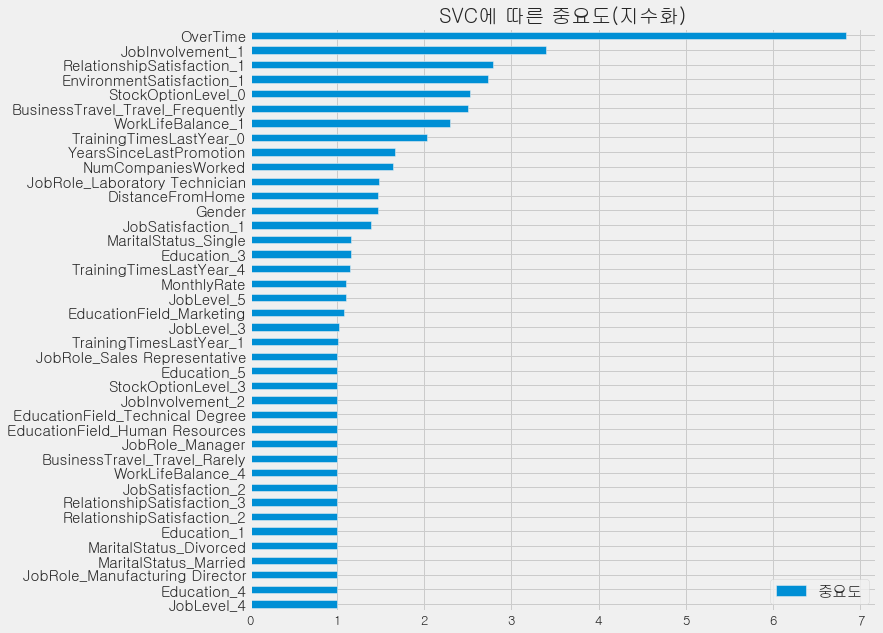

In [378]:
parameters = {'xtick.labelsize': 13, 'ytick.labelsize': 15, 'legend.fontsize': 15, }
plt.rcParams.update(parameters)

Coef_exp.head(40).sort_values(by='중요도').plot(kind='barh', figsize=(10,10))
plt.title("SVC에 따른 중요도(지수화)", fontsize=20)

## 4-1. XGBoost

In [61]:
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [63]:
xgb_clf = XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[863   0]
 [  0 166]]

정확도 점수:
1.0000

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00

테스트 결과: 

오차행렬:
[[352  18]
 [ 53  18]]

정확도 점수:
0.8390

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.87  0.50      0.84       0.68          0.81
recall      0.95  0.25      0.84       0.60          0.84
f1-score    0.91  0.34      0.84       0.62          0.82
support   370.00 71.00      0.84     441.00        441.00


In [65]:
print("Roc_Auc_Score:",roc_auc_score(y_test, xgb_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, xgb_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(xgb_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.6024362390559574
정확도 점수: 0.8390022675736961
정확도 교차 검증 점수: 0.8413636363636364


## 4-2. Parameter 조정

In [66]:
xgb_cfl = XGBClassifier(n_jobs = -1, eval_metric='mlogloss')

params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search.fit(X_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(random_search.best_params_, 
                                                  random_search.best_score_))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 52.4min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 54.4min finished


최적 하이퍼 파라미터:{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 1.0}, 최적 평균 정확도:0.850


In [67]:
# 새로운 파라미터로 훈련

xgb_clf = XGBClassifier(objective='binary:logistic', subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=5,
                        learning_rate=0.1, gamma=5, colsample_bytree=1, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[857   6]
 [ 69  97]]

정확도 점수:
0.9271

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   0.93   0.94      0.93       0.93          0.93
recall      0.99   0.58      0.93       0.79          0.93
f1-score    0.96   0.72      0.93       0.84          0.92
support   863.00 166.00      0.93    1029.00       1029.00

테스트 결과: 

오차행렬:
[[356  14]
 [ 49  22]]

정확도 점수:
0.8571

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.88  0.61      0.86       0.75          0.84
recall      0.96  0.31      0.86       0.64          0.86
f1-score    0.92  0.41      0.86       0.66          0.84
support   370.00 71.00      0.86     441.00        441.00


In [68]:
print("Roc_Auc_Score:",roc_auc_score(y_test, xgb_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, xgb_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(xgb_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Test_roc_auc_score_list.append(roc_auc_score(y_test, xgb_clf.predict(X_test)))
Test_accuracy_list.append(accuracy_score(y_test, xgb_clf.predict(X_test)))
Test_cv_score_list.append(cross_val_score(xgb_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.6360106585458698
정확도 점수: 0.8571428571428571
정확도 교차 검증 점수: 0.8481818181818183


Text(0.5, 1.0, 'XGBoost에 의한 주요 변수')

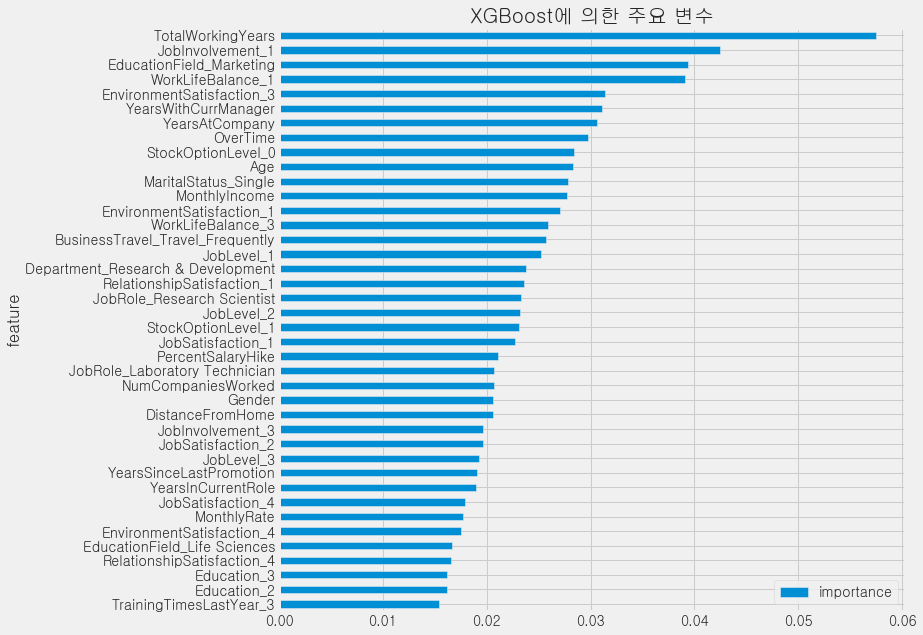

In [69]:
df = feature_imp(X, xgb_clf)[:40].sort_values(by='importance')
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('XGBoost에 의한 주요 변수')

## 5-1. Light GBM

In [70]:
# !pip install lightgbm
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[863   0]
 [  0 166]]

정확도 점수:
1.0000

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00

테스트 결과: 

오차행렬:
[[357  13]
 [ 53  18]]

정확도 점수:
0.8503

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.87  0.58      0.85       0.73          0.82
recall      0.96  0.25      0.85       0.61          0.85
f1-score    0.92  0.35      0.85       0.63          0.82
support   370.00 71.00      0.85     441.00        441.00


In [71]:
print("Roc_Auc_Score:",roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, lgb_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(lgb_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.6091929958127142
정확도 점수: 0.8503401360544217
정확도 교차 검증 점수: 0.8548989898989898


## 5-2. Parameter 조정

In [72]:
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(lgb_clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=5, verbose=3, random_state=42)
start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(random_search.best_params_, 
                                                  random_search.best_score_))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 15.8min finished



 Time taken: 0 hours 15 minutes and 50.45 seconds.
최적 하이퍼 파라미터:{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.02, 'colsample_bytree': 0.6}, 최적 평균 정확도:0.834


In [73]:
lgb_clf = LGBMClassifier(subsample = 0.8 , n_estimators = 500, min_child_weight = 10, max_depth = 3, learning_rate=0.02, 
                         colsample_bytree=0.6)
lgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

훈련 결과: 

오차행렬:
[[857   6]
 [ 69  97]]

정확도 점수:
0.9271

분류 보고:
             0.0    1.0  accuracy  macro avg  weighted avg
precision   0.93   0.94      0.93       0.93          0.93
recall      0.99   0.58      0.93       0.79          0.93
f1-score    0.96   0.72      0.93       0.84          0.92
support   863.00 166.00      0.93    1029.00       1029.00

테스트 결과: 

오차행렬:
[[356  14]
 [ 49  22]]

정확도 점수:
0.8571

분류 보고:
             0.0   1.0  accuracy  macro avg  weighted avg
precision   0.88  0.61      0.86       0.75          0.84
recall      0.96  0.31      0.86       0.64          0.86
f1-score    0.92  0.41      0.86       0.66          0.84
support   370.00 71.00      0.86     441.00        441.00


In [74]:
print("Roc_Auc_Score:",roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("정확도 점수:", accuracy_score(y_test, lgb_clf.predict(X_test)))
print("정확도 교차 검증 점수:", cross_val_score(lgb_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Test_roc_auc_score_list.append(roc_auc_score(y_test, lgb_clf.predict(X_test)))
Test_accuracy_list.append(accuracy_score(y_test, lgb_clf.predict(X_test)))
Test_cv_score_list.append(cross_val_score(lgb_clf,X_test,y_test,cv=10,scoring='accuracy').mean())

Roc_Auc_Score: 0.6035020936429387
정확도 점수: 0.8503401360544217
정확도 교차 검증 점수: 0.8504545454545454


Text(0.5, 1.0, 'Feature Importance according to Light GBM')

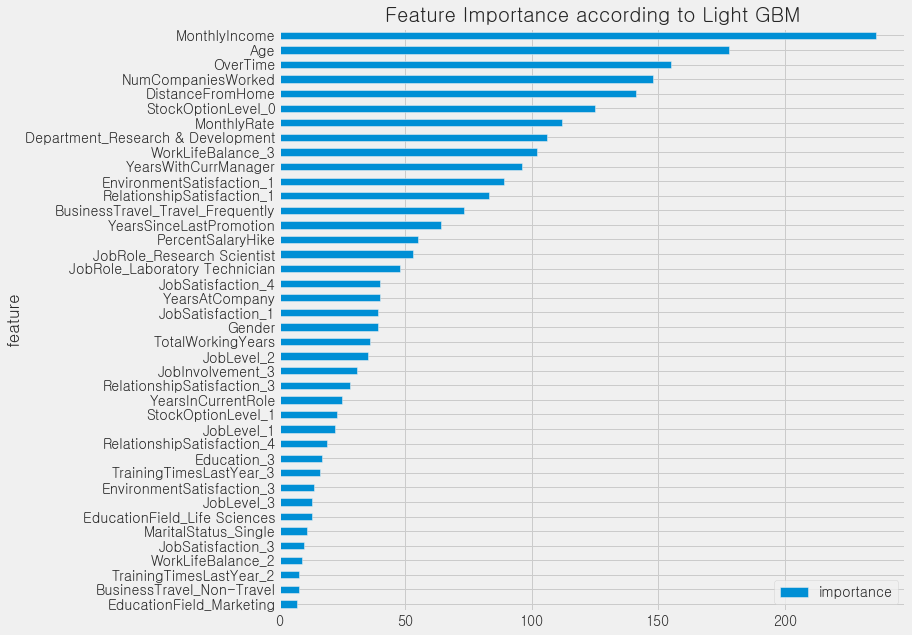

In [75]:
df = feature_imp(X, lgb_clf)[:40].sort_values(by='importance')
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Light GBM')

## 조정된 파라미터로 최적의 모델 찾기

In [282]:
Adjusted_Pred_score = pd.DataFrame({"roc_auc_score": Test_roc_auc_score_list, "Accuracy":Test_accuracy_list, "cv_score":Test_cv_score_list}, index=model_list ).sort_values(by="Accuracy",ascending=False)
Adjusted_Pred_score 

,roc_auc_score,Accuracy,cv_score
LogisticRegression,0.72,0.90,0.85
Support Vector Machine,0.72,0.88,0.86
XGBoost,0.64,0.86,0.85
LightGBM,0.60,0.85,0.85
Random Forest Classifier,0.55,0.84,0.84


Text(0.5, 1.0, '모델 성능 평가')

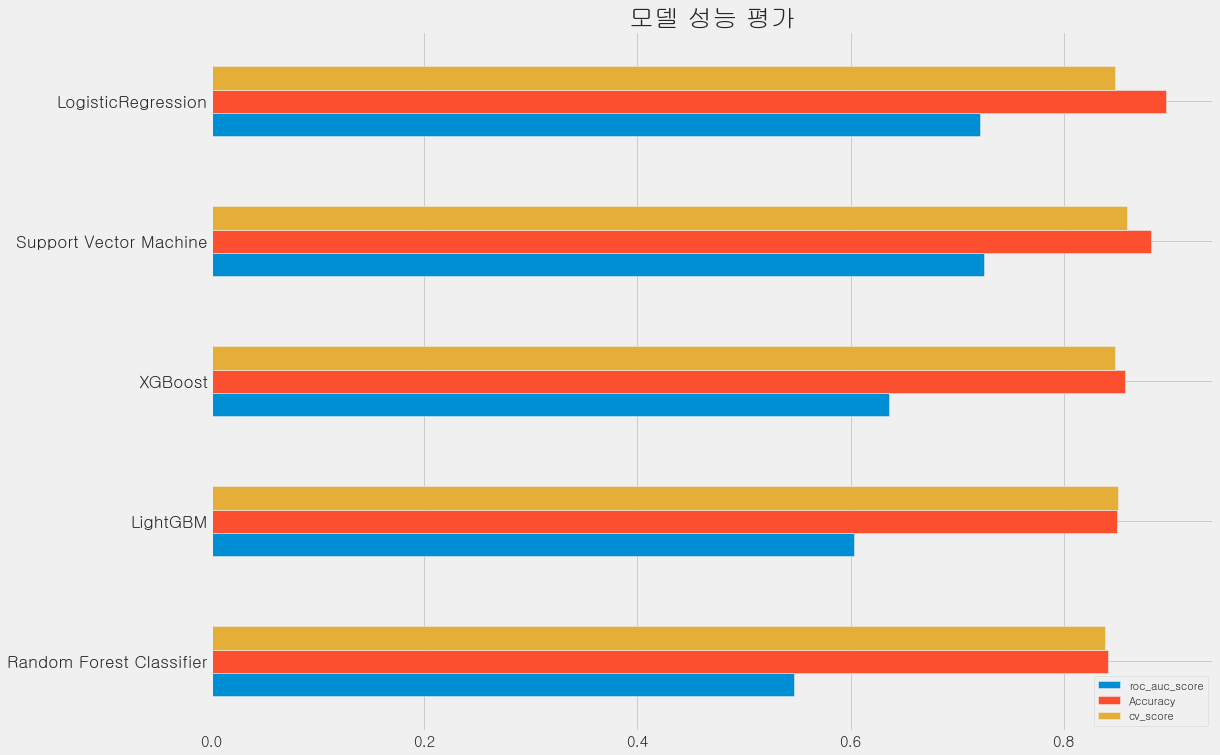

In [380]:
parameters = {'xtick.labelsize': 15, 'ytick.labelsize': 17, 'legend.fontsize': 11}
plt.rcParams.update(parameters)
fig = Adjusted_Pred_score.sort_values(by="Accuracy").plot(kind='barh', figsize=(16,12))
plt.title('모델 성능 평가', fontsize=25)

1. roc_auc_score가 가장 높은 Logistic Regression와 Support Vector Machine을 이용하여 요인 계수 분석
2. Logistic Regression의 roc_auc_score와 Accuracy가 제일 높으므로 로지스틱 회귀 모델로 퇴사자 예측 모델 구성

In [356]:
# 로지스틱 회귀 분석에 따른 요인별 중요도(Top20)
odds = np.exp(lr_clf.coef_[0])
Coef_exp = pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
Coef_exp.rename(columns = {"coef" : "중요도_lr"}, inplace=True)

# SVC에 따른 요인별 중요도(Top20)
odds_1 = np.exp(svm_clf.coef_[0])
Coef_exp_1 = pd.DataFrame(odds_1, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
Coef_exp_1.rename(columns = {"coef" : "중요도_svm"}, inplace=True)

In [357]:
Coef_exp_lr = Coef_exp.head(20).sort_values(by='중요도_lr')
Coef_exp_svc = Coef_exp_1.head(20).sort_values(by='중요도_svm')

Text(0.5, 1.0, 'SVM에 따른 요인별 중요도(top20)')

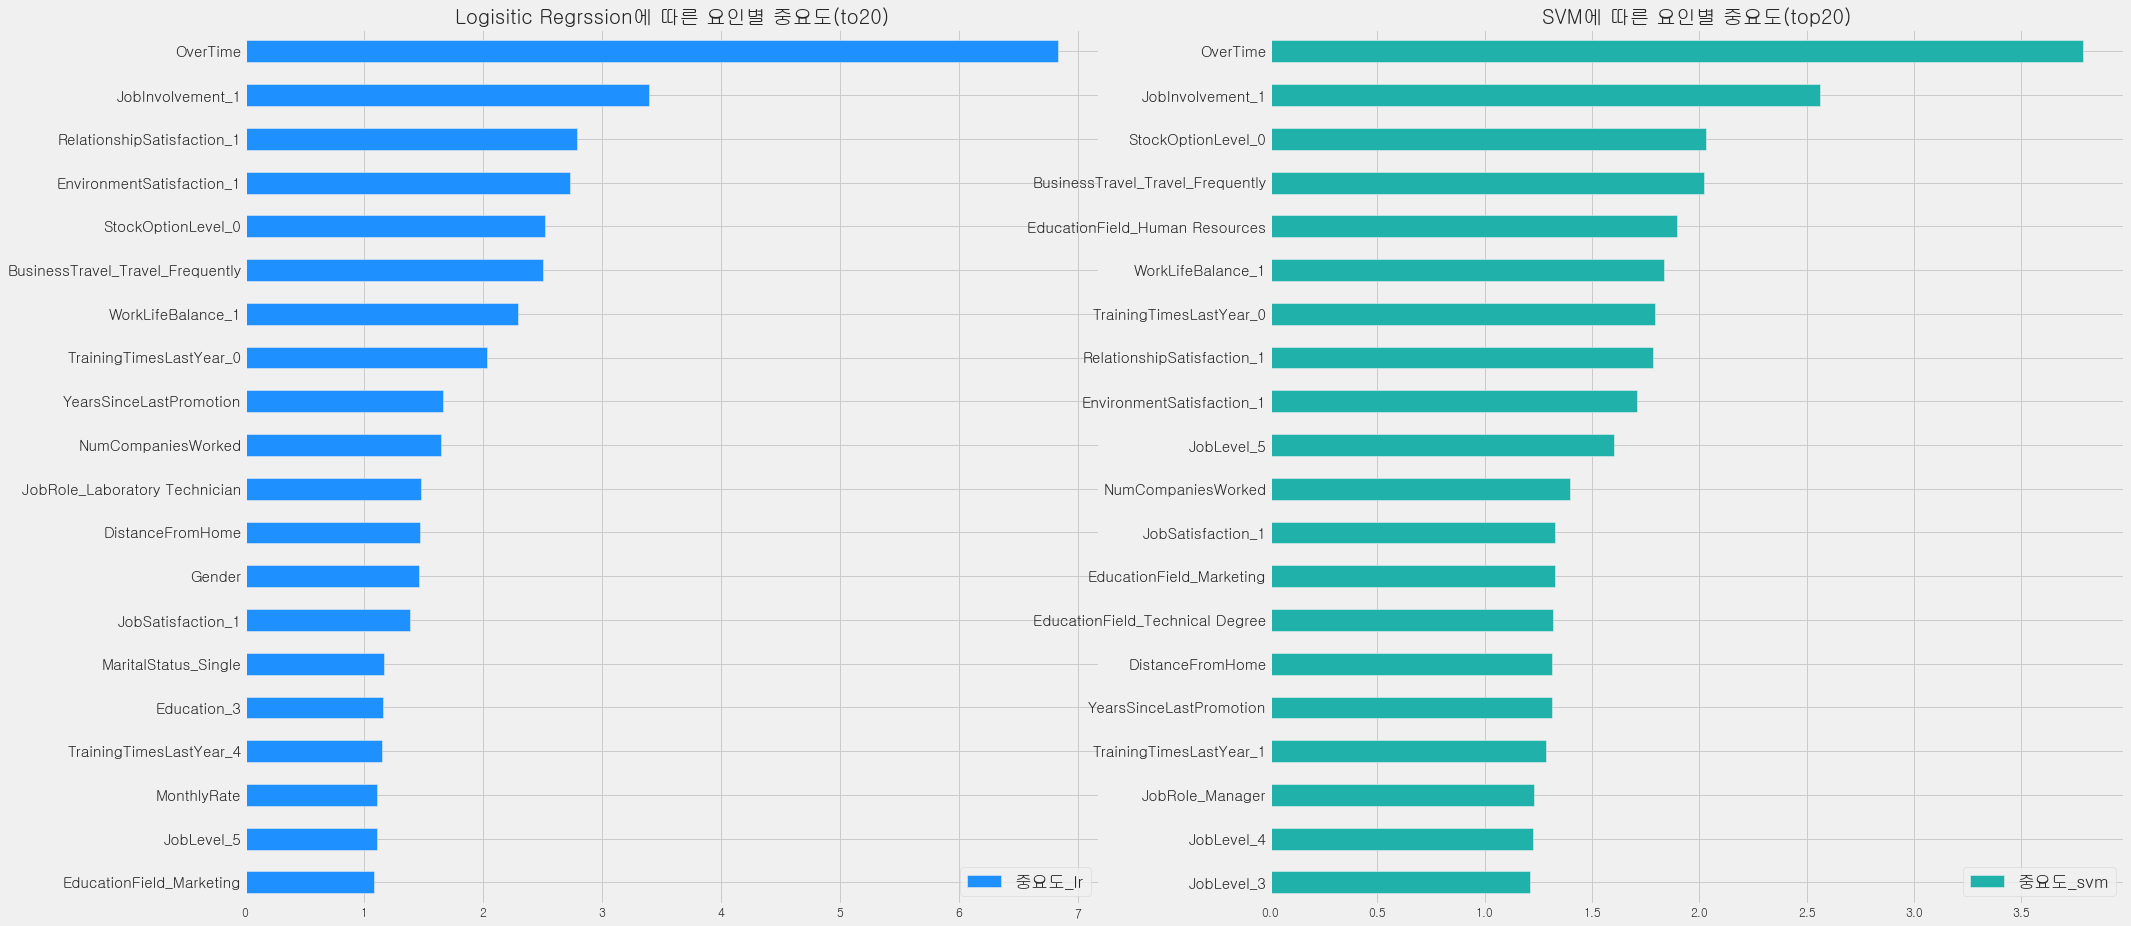

In [391]:
parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 15, 'legend.fontsize': 17}
plt.rcParams.update(parameters)

f,ax=plt.subplots(1,2,figsize=(30,15))

Coef_exp_lr.plot(kind="barh", ax=ax[0],color = 'dodgerblue')
ax[0].set_title("Logisitic Regrssion에 따른 요인별 중요도(to20)",fontsize=20)
Coef_exp_svc.plot(kind="barh", ax=ax[1],color='lightseagreen')
ax[1].set_title("SVM에 따른 요인별 중요도(top20)",fontsize=20)

In [141]:
Model = df_data_og[["EmployeeNumber"]]

Model["Attrition_prd"] = lr_clf.predict(X)
for i in range(len(Model["Attrition_prd"])):
    if Model["Attrition_prd"][i] == 1:
        Model["Attrition_prd"][i] = 'Yes'
    else:
        Model["Attrition_prd"][i] = 'No'


Model["Attrition_proba"] = 1
for i in range(len(Model["Attrition_proba"] )):
    Model["Attrition_proba"][i] = lr_clf.predict_proba(X)[i][1].astype('str')
    i +=1
Model["Attrition_proba"]  = round(Model["Attrition_proba"].astype('float'),2)

Model

,EmployeeNumber,Attrition_prd,Attrition_proba
0,1,Yes,0.82
1,2,No,0.00
2,4,Yes,0.54
3,5,No,0.19
4,7,No,0.27
...,...,...,...
1465,2061,No,0.01
1466,2062,No,0.02
1467,2064,No,0.04
1468,2065,No,0.02


In [239]:
# 기존 데이터셋과 퇴사 예측 결과 합치기
df_1 = pd.read_csv("C:/Users/midashrm/Documents/Pythonwork/WA_Fn-UseC_-HR-Employee-Attrition.csv")
columns = df_1.columns.to_list()
new_columns = ["Attiriton_prd","Attrition_proba"]
Model_combined = pd.merge(df_1, Model, how="left", on='EmployeeNumber')
Model_combined

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_prd,Attrition_proba
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes,0.82
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No,0.00
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes,0.54
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No,0.19
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,No,0.01
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,No,0.02
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,No,0.04
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,No,0.02


In [241]:
# 칼럼 재배치 및 최종 데이터셋
Model_combined.columns.to_list()
New_columns = ['Age',
 'Attrition', 
'Attrition_prd',
 'Attrition_proba',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'
]
Model_combined = Model_combined[New_columns]
Model_combined

,Age,Attrition,Attrition_prd,Attrition_proba,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Yes,0.82,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,No,0.00,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Yes,0.54,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,No,0.19,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,No,0.27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,No,0.01,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,No,0.02,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,No,0.04,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,No,0.02,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
